# ResNet-50 Models

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers as tkl
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [3]:
X_train = X_train / 255
X_test = X_test / 255

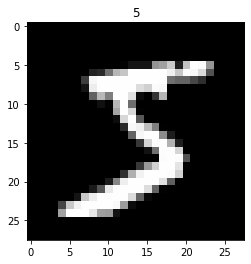

In [4]:
plt.imshow(X_train[0], cmap = "Greys_r")
plt.title(classes[y_train[0]])
plt.show()

In [5]:
def residual_block(X, concat, filters, kernel_size):
    conv3x3_v1 = tkl.Conv2D(filters, kernel_size = kernel_size, strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = "he_normal", bias_initializer = "he_normal")(X)
    conv3x3_v2 = tkl.Conv2D(filters, kernel_size = kernel_size, strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = "he_normal", bias_initializer = "he_normal")(conv3x3_v1)
    output = tkl.Concatenate(axis = 3)([conv3x3_v2, concat])
    return output, conv3x3_v2

### 1. ResNet Model v1 - 2

In [23]:
def resnet_v1():
    input_layer = keras.Input(shape = (28, 28, 1), name = "input_1")
    
    A1 = tkl.Conv2D(64, kernel_size = (3, 3), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = "he_normal", bias_initializer = "he_normal")(input_layer)
    
    R2, A2 = residual_block(A1, A1, 64, (3, 3))
    R3, A3 = residual_block(R2, A2, 64, (3, 3))
    
    P5 = tkl.GlobalAveragePooling2D(name = "pool_5")(R3)
    
    output = tkl.Dense(10, activation = "softmax", name = "output", kernel_initializer = "he_normal", bias_initializer = "he_normal")(P5)
    
    model = keras.Model(input_layer, output, name = "ResNetv1")
    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model

In [24]:
resnet_v1 = resnet_v1()

In [28]:
history = resnet_v1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 3)

Epoch 1/3


2022-10-25 17:32:40.314554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1873/1875 [============================>.] - ETA: 0s - loss: 0.4496 - accuracy: 0.8518

2022-10-25 17:33:21.460596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 46s 24ms/step - loss: 0.4492 - accuracy: 0.8520 - val_loss: 0.1435 - val_accuracy: 0.9572
Epoch 2/3
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1112 - accuracy: 0.9669 - val_loss: 0.0835 - val_accuracy: 0.9734
Epoch 3/3
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0747 - accuracy: 0.9772 - val_loss: 0.0453 - val_accuracy: 0.9846


In [29]:
predictions = resnet_v1.predict(X_test)

 14/313 [>.............................] - ETA: 2s

2022-10-25 17:34:53.607700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 14ms/step


In [30]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(predictions, axis = 1), 10)

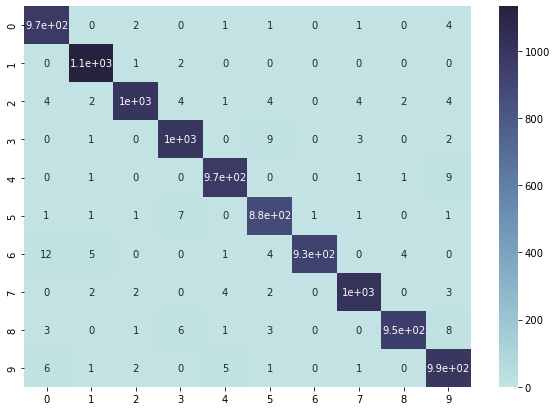

In [31]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

### 2. ResNet Model v2 - 4

In [32]:
def resnet_v2():
    input_layer = keras.Input(shape = (28, 28, 1), name = "input_1")
    
    A1 = tkl.Conv2D(64, kernel_size = (3, 3), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = "he_normal", bias_initializer = "he_normal")(input_layer)
    
    R2, A2 = residual_block(A1, A1, 64, (3, 3))
    R3, A3 = residual_block(R2, A2, 64, (3, 3))
    
    P2 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same")(R3)
    
    R4, A4 = residual_block(P2, P2, 128, (3, 3))
    R5, A5 = residual_block(R4, A4, 128, (3, 3))
    
    P5 = tkl.GlobalAveragePooling2D(name = "pool_5")(R5)
    
    output = tkl.Dense(10, activation = "softmax", name = "output", kernel_initializer = "he_normal", bias_initializer = "he_normal")(P5)
    
    model = keras.Model(input_layer, output, name = "ResNetv2")
    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model

In [33]:
resnet_v2 = resnet_v2()

In [34]:
history = resnet_v2.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 3)

Epoch 1/3


2022-10-25 17:34:59.012435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1874/1875 [============================>.] - ETA: 0s - loss: 0.2301 - accuracy: 0.9241

2022-10-25 17:35:50.109754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 57s 30ms/step - loss: 0.2300 - accuracy: 0.9241 - val_loss: 0.0451 - val_accuracy: 0.9857
Epoch 2/3
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0481 - accuracy: 0.9852 - val_loss: 0.0315 - val_accuracy: 0.9898
Epoch 3/3
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0366 - accuracy: 0.9892 - val_loss: 0.0317 - val_accuracy: 0.9905


In [35]:
predictions = resnet_v2.predict(X_test)

  5/313 [..............................] - ETA: 4s 

2022-10-25 17:37:47.822577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 5s 16ms/step


In [36]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(predictions, axis = 1), 10)

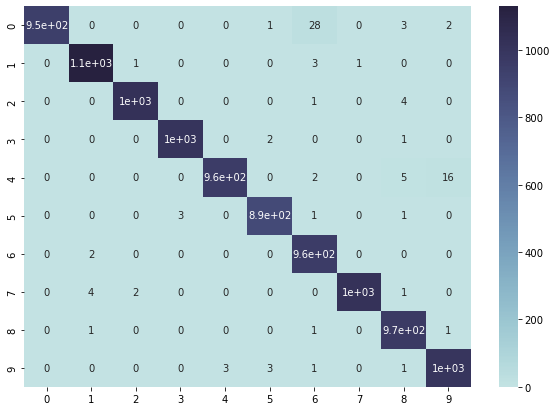

In [37]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

### 3. ResNet Model v3 - 6

In [38]:
def resnet_v3():
    input_layer = keras.Input(shape = (28, 28, 1), name = "input_1")
    
    A1 = tkl.Conv2D(64, kernel_size = (3, 3), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = "he_normal", bias_initializer = "he_normal")(input_layer)
    
    R2, A2 = residual_block(A1, A1, 64, (3, 3))
    R3, A3 = residual_block(R2, A2, 64, (3, 3))
    
    P2 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same")(R3)
    
    R4, A4 = residual_block(P2, P2, 128, (3, 3))
    R5, A5 = residual_block(R4, A4, 128, (3, 3))
    
    P3 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same")(R5)
    
    R6, A6 = residual_block(P3, P3, 256, (3, 3))
    R7, A7 = residual_block(R6, A6, 256, (3, 3))
    
    P5 = tkl.GlobalAveragePooling2D(name = "pool_5")(R7)
    
    output = tkl.Dense(10, activation = "softmax", name = "output", kernel_initializer = "he_normal", bias_initializer = "he_normal")(P5)
    
    model = keras.Model(input_layer, output, name = "ResNetv3")
    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model

In [39]:
resnet_v3 = resnet_v3()

In [40]:
history = resnet_v3.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 3)

Epoch 1/3


2022-10-25 17:37:53.746041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 0.2739 - accuracy: 0.9085

2022-10-25 17:39:11.636825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 84s 44ms/step - loss: 0.2739 - accuracy: 0.9085 - val_loss: 0.0357 - val_accuracy: 0.9884
Epoch 2/3
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0494 - accuracy: 0.9856 - val_loss: 0.0283 - val_accuracy: 0.9912
Epoch 3/3
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0354 - accuracy: 0.9891 - val_loss: 0.0392 - val_accuracy: 0.9898


In [41]:
predictions = resnet_v3.predict(X_test)

  1/313 [..............................] - ETA: 1:11

2022-10-25 17:42:48.356919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 5s 15ms/step


In [42]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(predictions, axis = 1), 10)

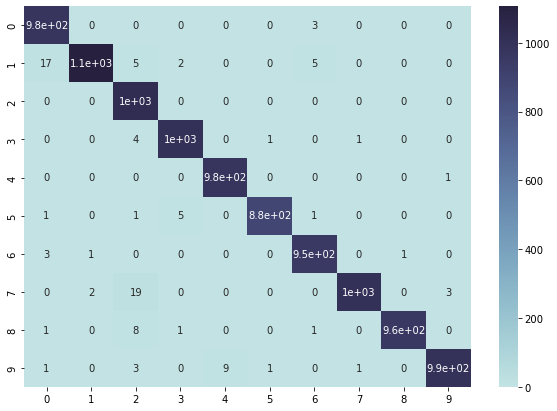

In [43]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

### 4. ResNet Model v4 - 8

In [6]:
def resnet_v4():
    input_layer = keras.Input(shape = (28, 28, 1), name = "input_1")
    
    A1 = tkl.Conv2D(64, kernel_size = (3, 3), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = "he_normal", bias_initializer = "he_normal")(input_layer)
    
    R2, A2 = residual_block(A1, A1, 64, (3, 3))
    R3, A3 = residual_block(R2, A2, 64, (3, 3))
    
    P2 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same")(R3)
    
    R4, A4 = residual_block(P2, P2, 128, (3, 3))
    R5, A5 = residual_block(R4, A4, 128, (3, 3))
    
    P3 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same")(R5)
    
    R6, A6 = residual_block(P3, P3, 256, (3, 3))
    R7, A7 = residual_block(R6, A6, 256, (3, 3))
    
    P4 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same")(R7)
    
    R8, A8 = residual_block(P4, P4, 512, (3, 3))
    R9, A9 = residual_block(R8, A8, 512, (3, 3))
    
    P5 = tkl.GlobalAveragePooling2D(name = "pool_5")(R9)
    
    output = tkl.Dense(10, activation = "softmax", name = "output", kernel_initializer = "he_normal", bias_initializer = "he_normal")(P5)
    
    model = keras.Model(input_layer, output, name = "ResNetv4")
    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model

In [7]:
resnet_v4 = resnet_v4()

2022-10-25 17:09:00.259912: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-25 17:09:00.260011: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro


In [8]:
resnet_v4.summary()

Model: "ResNetv1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 28, 28, 64)   640         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 28, 28, 64)   36928       ['conv2d[0][0]']                 
                                                                                                  
 conv2d_2 (Conv2D)              (None, 28, 28, 64)   36928       ['conv2d_1[0][0]']               
                                                                                           

In [9]:
history = resnet_v4.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 3)

Epoch 1/3


2022-10-25 17:09:00.702358: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-25 17:09:01.163981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 0.2896 - accuracy: 0.9135

2022-10-25 17:10:39.663040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 104s 55ms/step - loss: 0.2896 - accuracy: 0.9135 - val_loss: 0.0691 - val_accuracy: 0.9796
Epoch 2/3
1875/1875 [==============================] - 102s 54ms/step - loss: 0.0658 - accuracy: 0.9818 - val_loss: 0.0688 - val_accuracy: 0.9824
Epoch 3/3
1875/1875 [==============================] - 102s 54ms/step - loss: 0.0492 - accuracy: 0.9866 - val_loss: 0.0349 - val_accuracy: 0.9890


In [12]:
predictions = resnet_v4.predict(X_test)

  5/313 [..............................] - ETA: 4s  

2022-10-25 17:18:42.147631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 5s 15ms/step


In [13]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(predictions, axis = 1), 10)

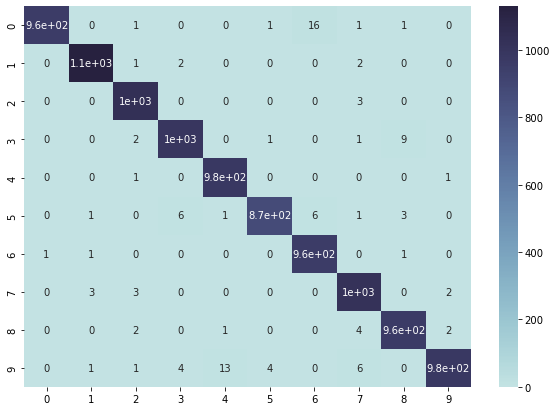

In [14]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()